In [2]:
import matplotlib.pyplot as plt
#I = plt.imread('images_training.tiff')

In [3]:
from PIL import Image
im = Image.open('images_training.tiff')
plt.imshow(im[0])

TypeError: 'TiffImageFile' object does not support indexing

In [1]:
from skimage import io

train = io.imread('images_training.tiff')
print (train.shape)


(209933, 24, 24, 3)


In [3]:
test = io.imread('images_test.tiff')

In [4]:
#convert the images into numpy data
import numpy as np
train_x=np.stack(train)
test_x=np.stack(test)

In [ ]:
#we now reduce the image arrays to values below one 
train_x=train_x/255.
test_x=test_x/255.

In [9]:
import pandas as pd
col=['ID','No_spot','x-cord1','y-cord1','x-cord2','y-cord2']

desc=pd.read_csv('descriptions_training.csv',names=col)

In [94]:
t9=desc[desc.No_spot ==2]
t9.shape

(9604, 6)

In [11]:
train_y = keras.utils.np_utils.to_categorical(desc.No_spot)

In [10]:
import random
import keras
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import SGD, Adam, Adamax

Using TensorFlow backend.


In [12]:
from sklearn.feature_extraction.text import TfidfTransformer as tft
import string
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)


from collections import Counter
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import KFold as kf
from sklearn.model_selection import cross_val_score as cvs
from sklearn.feature_extraction.text import CountVectorizer as cv
from sklearn.feature_extraction.text import TfidfVectorizer as tv
from sklearn.linear_model import LogisticRegression as lr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import RobustScaler as rs
from sklearn.metrics import classification_report as cr
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn.kernel_ridge import KernelRidge as kr
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as fs
from sklearn.linear_model import LinearRegression as Lr
from sklearn.pipeline import make_pipeline as mp
from sklearn.naive_bayes import MultinomialNB as mnb
from sklearn.base import BaseEstimator as be
from sklearn.base import TransformerMixin as tm
from sklearn.base import RegressorMixin as rm
from sklearn.base import clone
from nltk.stem import PorterStemmer as ps
from nltk.tokenize import word_tokenize as wt

from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn import model_selection as ms
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as gn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as ld
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import train_test_split as tts

In [22]:
xTrain,xTest,yTrain,yTest=tts(train_x,desc['x-cord1'],test_size=0.3,random_state=42)

In [33]:
from keras.layers.advanced_activations import LeakyReLU
epochs = 15
batch_size = 128
model = Sequential()
model.add(Convolution2D(32, (3, 3), padding='valid',activation='linear', input_shape=(24,24,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(Convolution2D(16, (3, 3), padding='valid',activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Convolution2D(8, (3, 3), padding='valid',activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(Dense(1,activation='linear'))

#Dropout is used to solve problems of overfitting
#LeakyReLU is used since the outcome is not linear
#ReLU can be used but it dies frequently

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 32)        896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 16)        4624      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 20, 20, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           1160      
__________

In [34]:
model.compile(optimizer=Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-9, amsgrad=False), loss='mae',metrics=['accuracy'])

In [ ]:
model2=model.fit(xTrain,yTrain , batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(xTest,yTest))

Train on 146953 samples, validate on 62980 samples
Epoch 1/15
146953/146953 [==============================] - 6348s 43ms/step - loss: 3.1870 - acc: 0.2218 - val_loss: 2.3601 - val_acc: 0.1925
Epoch 2/15
146953/146953 [==============================] - 7382s 50ms/step - loss: 1.7162 - acc: 0.2311 - val_loss: 1.6058 - val_acc: 0.1098
Epoch 3/15
146953/146953 [==============================] - 6206s 42ms/step - loss: 1.5368 - acc: 0.2350 - val_loss: 1.0339 - val_acc: 0.3537
Epoch 4/15
146953/146953 [==============================] - 5818s 40ms/step - loss: 1.4886 - acc: 0.2354 - val_loss: 0.9833 - val_acc: 0.1244
Epoch 5/15
146953/146953 [==============================] - 6148s 42ms/step - loss: 1.4316 - acc: 0.2448 - val_loss: 1.0107 - val_acc: 0.1468
Epoch 6/15
146944/146953 [============================>.] - ETA: 0s - loss: 1.4032 - acc: 0.2458

In [ ]:
# The validation loss is lower than the training loss signifying a model which isnt overfitting .
#The same can be said about the acuracy of bot

In [20]:
test_eval=model.evaluate(xTest,yTest,verbose=1)
print('Test loss:',test_eval[0])
print('Test Accuracy:',test_eval[1])

62980/62980 [==============================] - 563s 9ms/step
Test loss: 0.06061582215409519
Test Accuracy: 0.9800412829469672


In [21]:
accuracy=model2.history['acc']
val_acc=model2.history['val_acc']

loss=model2.history['loss']
val_loss=model2.history['val_loss']
epochs=range(len(accuracy))


In [ ]:
 # Plotting the graph of training and Validation accuracy as well as training and validation loss
# the model is said to be overfitting incase training and validation accuracy is not linearly increasing also when validation and training
#loss are not linearly decreasing
#from the below the graph ,its not the case hence we can say we have a generally perfect model which is 98% accurate

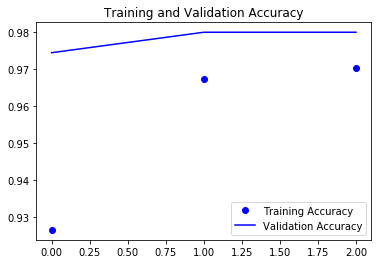

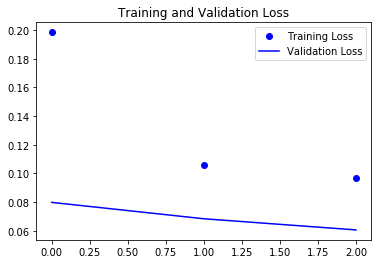

In [23]:
from matplotlib import pyplot as plt

plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()



In [17]:
predicton=model.predict(test_x) #predicting our validation set

In [18]:
prediction=np.argmax(np.round(predicton),axis=1) #rounding the values and then picking the maximum value for each index of the row

In [19]:
prediction

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [21]:
final=pd.DataFrame({'No_Spots':prediction})
final.to_csv('final.csv',index=False)

In [87]:
correct=np.where(prediction==YTest)[0]
incorrect=np.where(prediction !=YTest)[0]
print('Found %d correct labels'%len(correct))
print('Found %d incorrect labels'%len(incorrect))

Found 61715 correct labels
Found 1265 incorrect labels


In [50]:
from sklearn.metrics import classification_report as cr
print(cr(YTest,prediction,target_names=['0','1','2']))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     30016
           1       0.97      0.99      0.98     30089
           2       0.91      0.74      0.82      2875

   micro avg       0.98      0.98      0.98     62980
   macro avg       0.96      0.91      0.93     62980
weighted avg       0.98      0.98      0.98     62980



In [56]:
model.save_weights('weights.h5')


In [57]:
model.save('modelcnn.h5py')

In [48]:
YTest=np.argmax(np.round(yTest),axis=1)

In [52]:
from sklearn.metrics import confusion_matrix as cm
print('Confusion-Matrix')
print(cm(YTest,prediction))

Confusion-Matrix
[[29771   240     5]
 [   71 29816   202]
 [   18   729  2128]]


Text(0.5, 15.0, 'Predicted label')

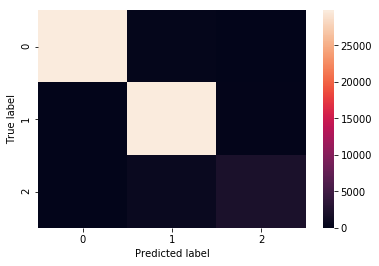

In [53]:
import seaborn as sns
conf=cm(YTest,prediction)
sns.heatmap(conf)
plt.ylabel('True label')
plt.xlabel('Predicted label')

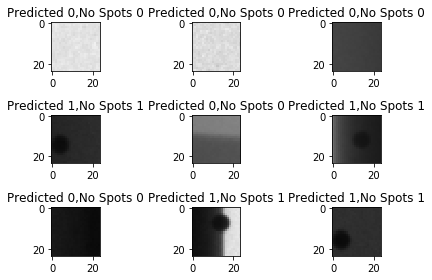

In [92]:
#plotting an over-view of correctly predicted images
for i,corect in enumerate(correct[45:54]):
    plt.subplot(3,3,i+1)
    plt.imshow(xTest[corect].reshape(24,24,3),cmap='gray',interpolation=None)
    plt.title('Predicted {},No Spots {}'.format(prediction[corect],YTest[corect]))
    plt.tight_layout()

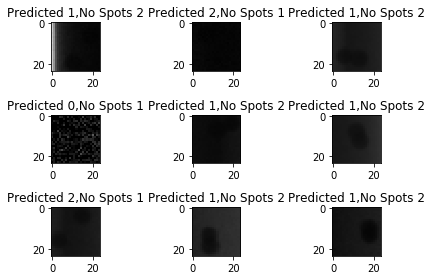

In [89]:
for i,incorect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(xTest[incorect].reshape(24,24,3),cmap='gray',interpolation=None)
    plt.title('Predicted {},No Spots {}'.format(prediction[incorect],YTest[incorect]))
    plt.tight_layout()